<a href="https://colab.research.google.com/github/soumyajt1991/Topic-Modeling-on-News-Articles/blob/main/Soumyajit_Das_Topic_Modeling_on_News_Articles_Capstone_Project_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Extraction/identification of major topics & themes discussed in news articles. </u></b>

## <b> Problem Description </b>

### In this project your task is to identify major themes/topics across a collection of BBC news articles. You can use clustering algorithms such as Latent Dirichlet Allocation (LDA), Latent Semantic Analysis (LSA) etc.

## <b> Data Description </b>

### The dataset contains a set of news articles for each major segment consisting of business, entertainment, politics, sports and technology. You need to create an aggregate dataset of all the news articles and perform topic modeling on this dataset. Verify whether these topics correspond to the different tags available.

Consists of 2225 documents from the BBC news website corresponding to stories in five topical areas from 2004-2005.
Natural Classes: 5 (business, entertainment, politics, sport, tech)


In [ ]:
# mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import string
import glob
import os
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
import spacy
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
news=[]
topics=[]

path="/content/drive/MyDrive/AlmaBetter/Cohort Aravali/Module 4/Week 4/Day 1/bbc/"

folders=['business','entertainment','politics','sport','tech'] 

for i in folders:
    all_files=os.listdir(path+i)
    for txt_files in all_files:
        files_path=path+i+'/'+txt_files
        with open(files_path,'rb') as f:
            text=f.read()
        news.append(text)
        topics.append(i)

bbc = {'news':news,'topics':topics}
bbc = pd.DataFrame(bbc)

In [ ]:
bbc.head()

news    topics
0  b'India calls for fair trade rules\n\nIndia, w...  business
1  b'Steel firm \'to cut\' 45,000 jobs\n\nMittal ...  business
2  b'Call centre users \'lose patience\'\n\nCusto...  business
3  b'Ethiopia\'s crop production up 24%\n\nEthiop...  business
4  b"Safety alert as GM recalls cars\n\nThe world...  business

In [ ]:
bbc.shape

(2225, 2)

In [ ]:
bbc.news[0]

b'India calls for fair trade rules\n\nIndia, which attends the G7 meeting of seven leading industrialised nations on Friday, is unlikely to be cowed by its newcomer status.\n\nIn London on Thursday ahead of the meeting, India\'s finance minister, lashed out at the restrictive trade policies of the G7 nations. He objected to subsidies on agriculture that make it hard for developing nations like India to compete. He also called for reform of the United Nations, the World Bank and the IMF.\n\nPalaniappan Chidambaram, India\'s finance minister, argued that these organisations need to take into account the changing world order, given India and China\'s integration into the global economy. He said the issue is not globalisation but "the terms of engagement in globalisation." Mr Chidambaram is attending the G7 meeting as part of the G20 group of nations, which account for two thirds of the world\'s population. At a conference on developing enterprise hosted by UK finance minister Gordon Brown

In [ ]:
bbc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   news    2225 non-null   object
 1   topics  2225 non-null   object
dtypes: object(2)
memory usage: 34.9+ KB


In [ ]:
bbc.describe(include='all').T

count unique                                                top freq
news    2225   2127  b'Hotspot users gain free net calls\n\nPeople ...    2
topics  2225      5                                              sport  511

In [ ]:
len(bbc[bbc.duplicated()])

98

In [ ]:
# removing duplicate observations
bbc=bbc.drop_duplicates(ignore_index=True)

In [ ]:
bbc.shape

(2127, 2)

In [ ]:
bbc.topics.value_counts()

sport            505
business         503
politics         403
entertainment    369
tech             347
Name: topics, dtype: int64

In [ ]:
bbc.topics.value_counts(normalize=True)*100

sport            23.742360
business         23.648331
politics         18.946874
entertainment    17.348378
tech             16.314057
Name: topics, dtype: float64

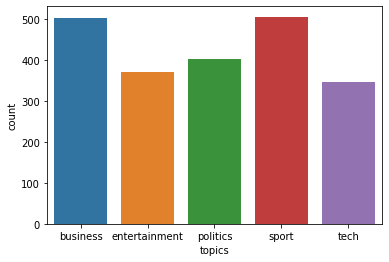

In [ ]:
import warnings 
warnings.filterwarnings("ignore")
sns.countplot(bbc['topics'], data=bbc)
plt.show()

In [ ]:
# creating dulicate of dataset for processing
bbc1=bbc.copy()

In [ ]:
bbc1['news'] = bbc1['news'].astype('str') 

In [ ]:
bbc1.news[0]

'b\'India calls for fair trade rules\\n\\nIndia, which attends the G7 meeting of seven leading industrialised nations on Friday, is unlikely to be cowed by its newcomer status.\\n\\nIn London on Thursday ahead of the meeting, India\\\'s finance minister, lashed out at the restrictive trade policies of the G7 nations. He objected to subsidies on agriculture that make it hard for developing nations like India to compete. He also called for reform of the United Nations, the World Bank and the IMF.\\n\\nPalaniappan Chidambaram, India\\\'s finance minister, argued that these organisations need to take into account the changing world order, given India and China\\\'s integration into the global economy. He said the issue is not globalisation but "the terms of engagement in globalisation." Mr Chidambaram is attending the G7 meeting as part of the G20 group of nations, which account for two thirds of the world\\\'s population. At a conference on developing enterprise hosted by UK finance minis

In [ ]:
len(bbc1.news[0])

1938

## text pre-processing

In [ ]:
# Remove HTML tags

In [ ]:
import re


In [ ]:
import re
def remove_html_tags(text):
	html_pattern = r'<.*?>'
	without_html = re.sub(pattern=html_pattern, repl=' ', string=text)
	return without_html

In [ ]:
bbc1['news'] = bbc1['news'].apply(remove_html_tags)

NameError: ignored

In [ ]:
# Remove urls

In [ ]:
def remove_urls(text):
	url_pattern = r'https?://\S+|www\.\S+' 
	without_urls = re.sub(pattern=url_pattern, repl=' ', string=text)
	return without_urls

In [ ]:
bbc1['news'] = bbc1['news'].apply(remove_urls)

In [ ]:
bbc1.news[0]

'b\'India calls for fair trade rules\\n\\nIndia, which attends the G7 meeting of seven leading industrialised nations on Friday, is unlikely to be cowed by its newcomer status.\\n\\nIn London on Thursday ahead of the meeting, India\\\'s finance minister, lashed out at the restrictive trade policies of the G7 nations. He objected to subsidies on agriculture that make it hard for developing nations like India to compete. He also called for reform of the United Nations, the World Bank and the IMF.\\n\\nPalaniappan Chidambaram, India\\\'s finance minister, argued that these organisations need to take into account the changing world order, given India and China\\\'s integration into the global economy. He said the issue is not globalisation but "the terms of engagement in globalisation." Mr Chidambaram is attending the G7 meeting as part of the G20 group of nations, which account for two thirds of the world\\\'s population. At a conference on developing enterprise hosted by UK finance minis

In [ ]:
# replacing every non-word characters with a white space 

In [ ]:
for i in range(len(bbc1.news)):      
  bbc1.news[i] = re.sub(r"b\'", " ", bbc1.news[i]) 
  bbc1.news[i] = re.sub(r"\\\'", " ", bbc1.news[i])    
  bbc1.news[i] = re.sub(r"\\n\\n", " ", bbc1.news[i]) 
  bbc1.news[i] = re.sub(r"\\\'s", " ", bbc1.news[i]) 

In [ ]:
# Convert accented characters to ASCII characters

In [ ]:
pip install Unidecode

     |████████████████████████████████| 245kB 5.8MB/s 


In [ ]:
import unidecode

def accented_to_ascii(text):
	text = unidecode.unidecode(text)
	return text

In [ ]:
bbc1['news'] = bbc1['news'].apply(accented_to_ascii)

In [ ]:
# remove punctuations

In [ ]:
def remove_punctuation(text):    
  translator = str.maketrans('', '', string.punctuation)
  return text.translate(translator)

In [ ]:
bbc1['news'] = bbc1['news'].apply(remove_punctuation)

In [ ]:
# Remove numbers

In [ ]:
def remove_numbers(text):
	number_pattern = r'\d+'
	without_number = re.sub(pattern=number_pattern, repl=" ", string=text)
	return without_number

In [ ]:
bbc1['news'] = bbc1['news'].apply(remove_numbers)

In [ ]:
# Lowercase all texts

In [ ]:
def lower_case_convertion(text):
	lower_text = text.lower()
	return lower_text

In [ ]:
bbc1['news'] = bbc1['news'].apply(lower_case_convertion)

In [ ]:
# Split attached words

In [ ]:
def split_word(text):
  split = re.split("([A-Z][a-z]+[^A-Z]*)",text)
  return " ".join(split)

In [ ]:
bbc1['news'] = bbc1['news'].apply(split_word)

In [ ]:
# Removing short length words

In [ ]:
bbc1['news'] = bbc1['news'].apply(lambda x: ' '.join([wds for wds in x.split() if len(wds)>1]))

In [ ]:
# Remove extra whitespaces

In [ ]:
def remove_extra_spaces(text):
	space_pattern = r'\s+'
	without_space = re.sub(pattern=space_pattern, repl=" ", string=text)
	return without_space

In [ ]:
bbc1['news'] = bbc1['news'].apply(remove_extra_spaces)

In [ ]:
# Standardizing and Spelling correction

In [ ]:
pip install autocorrect

     |████████████████████████████████| 624kB 5.3MB/s 
  Created wheel for autocorrect: filename=autocorrect-2.3.0-cp36-none-any.whl size=621588 sha256=e4f235d688bd9ad29416a3ab68c99168cc99c77e365508e9b2d1842089fe5283
  Stored in directory: /root/.cache/pip/wheels/cc/1c/30/6b0199afbd20eef5959f5eaa0ead86aeef84391740482b2279
Successfully built autocorrect


In [ ]:
import itertools
from autocorrect import Speller

def correction(text):
  standz = ''.join(''.join(s)[:2] for _, s in itertools.groupby(text)) 
  spell = Speller(lang='en') 
  correct_spell=spell(standz) 
  return correct_spell

In [ ]:
bbc1['news'] = bbc1['news'].apply(correction)

In [ ]:
bbc1.news[0]

'india calls for fair trade rules india which attends the meeting of seven leading industrialised nations on friday is unlikely to be cowed by its newcomer status in london on thursday ahead of the meeting india finance minister lashed out at the restrictive trade policies of the nations he objected to subsidies on agriculture that make it hard for developing nations like india to compete he also called for reform of the united nations the world bank and the imf palaniappan chidambaram india finance minister argued that these organisations need to take into account the changing world order given india and china integration into the global economy he said the issue is not globalisation but the terms of engagement in globalisation mr chidambaram is attending the meeting as part of the group of nations which account for two thirds of the world population at conference on developing enterprise hosted by uk finance minister gordon brown on friday he said that he was in favour of floating ex

In [ ]:
# Lemmatization

In [ ]:
from nltk.stem import WordNetLemmatizer 
from nltk import word_tokenize

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
from nltk.stem import WordNetLemmatizer 
lemmatizer = WordNetLemmatizer()

def lemmatize_word(text): 
	lemmas = [lemmatizer.lemmatize(wds, pos ='v') for wds in text.split()] 
	return " ".join(lemmas) 

In [ ]:
bbc1['news'] = bbc1['news'].apply(lemmatize_word)

In [ ]:
# remove stopwords

In [ ]:
from nltk.corpus import stopwords
import spacy
import gensim

# list of stopwords from nltk
stopwords_nltk = list(stopwords.words('english'))
sp = spacy.load('en_core_web_sm')
# list of stopwords from spacy
stopwords_spacy = list(sp.Defaults.stop_words)
# list of stopwords from gensim
stopwords_gensim = list(gensim.parsing.preprocessing.STOPWORDS)

# unique stopwords from all stopwords
all_stopwords = []
all_stopwords.extend(stopwords_nltk)
all_stopwords.extend(stopwords_spacy)
all_stopwords.extend(stopwords_gensim)
# all unique stop words
all_stopwords = list(set(all_stopwords))



def stop_words(text):  
  text = [wd.lower() for wd in text.split() if wd.lower() not in all_stopwords]
  return " ".join(text)

In [ ]:
bbc1['news'] = bbc1['news'].apply(stop_words)

In [ ]:
bbc1.news[0]

'india fair trade rule india attend meet seven lead industrialise nations friday unlikely cow newcomer status london thursday ahead meet india finance minister lash restrictive trade policies nations object subsidies agriculture hard develop nations like india compete reform unite nations world bank imf palaniappan chidambaram india finance minister argue organisations need account change world order india china integration global economy issue globalisation term engagement globalisation mr chidambaram attend meet group nations account thirds world population conference develop enterprise host uk finance minister gordon brown friday favour float exchange rat help countries cope economic shock flexible exchange rate channel absorb positive negative shock tell conference india china brazil south africa russia invite meet place london friday saturday china expect face renew pressure abandon fix exchange rate nations particular blame surge cheap chinese export countries try use fix exchang

In [ ]:
len(bbc1.news[0])

1173

In [ ]:
# remove frequent words

In [ ]:
freq = pd.Series(' '.join(bbc1['news']).split()).value_counts()[:15]
freq

mr            2858
people        1889
new           1869
year          1722
game          1585
win           1461
time          1414
use           1398
xa            1335
xc            1331
come          1170
play          1158
world         1121
government    1118
film          1067
dtype: int64

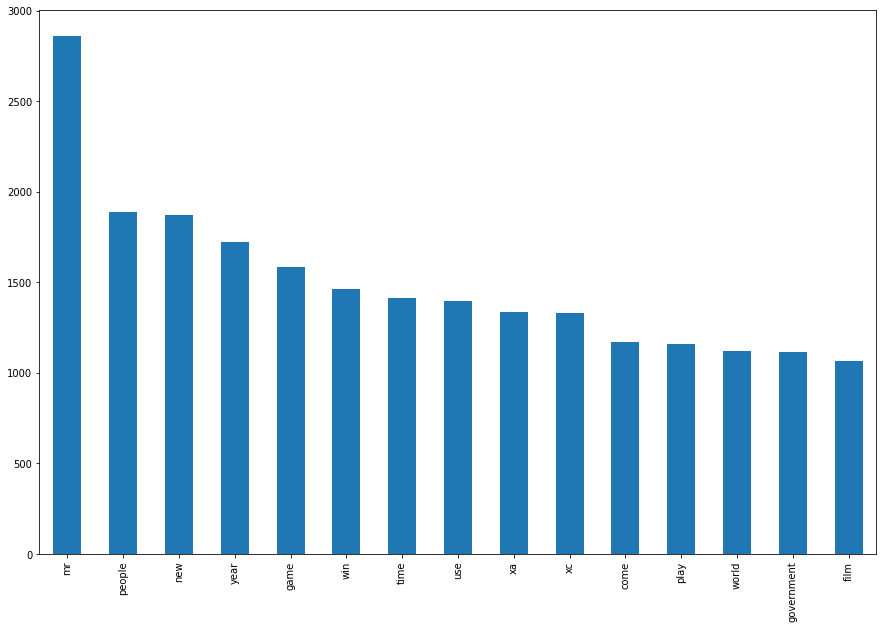

In [ ]:
# bar plot of frequent words

plt.figure(figsize=(15,10))
freq.plot.bar()
plt.show()

In [ ]:
freq_words = ['mr','xa','xc','use','come','tell','year','month','time']

In [ ]:
bbc1['news'] = bbc1['news'].apply(lambda x: " ".join(x for x in x.split() if x not in freq_words))

In [ ]:
bbc1.news[0]

'india fair trade rule india attend meet seven lead industrialise nations friday unlikely cow newcomer status london thursday ahead meet india finance minister lash restrictive trade policies nations object subsidies agriculture hard develop nations like india compete reform unite nations world bank imf palaniappan chidambaram india finance minister argue organisations need account change world order india china integration global economy issue globalisation term engagement globalisation chidambaram attend meet group nations account thirds world population conference develop enterprise host uk finance minister gordon brown friday favour float exchange rat help countries cope economic shock flexible exchange rate channel absorb positive negative shock conference india china brazil south africa russia invite meet place london friday saturday china expect face renew pressure abandon fix exchange rate nations particular blame surge cheap chinese export countries try fix exchange rat wish j

In [ ]:
len(bbc1.news[0])

1148

In [ ]:
from wordcloud import WordCloud

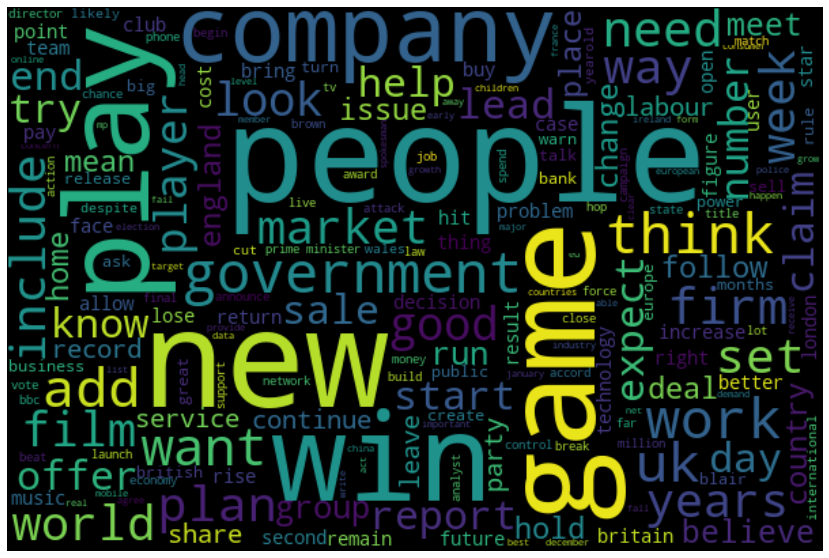

In [ ]:
# wordcloud of whole document

plt.figure(figsize=(15,10))
allWords = ' '.join(bbc1['news'])
wordCloud = WordCloud(width=600, height=400, random_state=0, max_font_size=100).generate(allWords)
plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

## feature extraction

In [ ]:
# now we will check for each topic what are the most frequent words, so that we can compare those terms with our model generated 5 cluster/topics

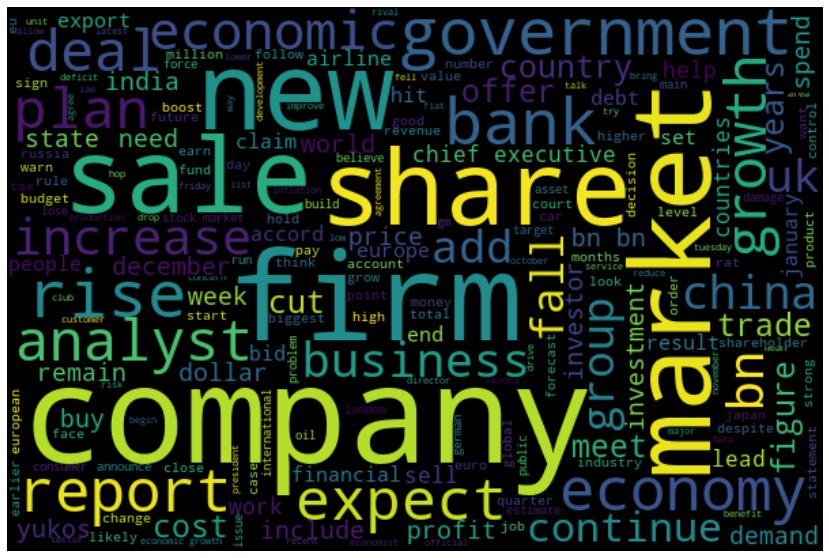

In [ ]:
# wordcloud of topic 'business'

plt.figure(figsize=(15,10))
allWords = ' '.join([topic for topic in bbc1[bbc1['topics']=='business']['news']])
wordCloud = WordCloud(width=600, height=400, random_state=0, max_font_size=100).generate(allWords)
plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
# frequent words of topic 'business'

pd.Series(' '.join(bbc1[bbc1['topics']=='business']['news']).split()).value_counts()[:10]

bn         772
company    620
firm       534
market     529
bank       451
rise       444
new        401
price      387
share      387
growth     358
dtype: int64

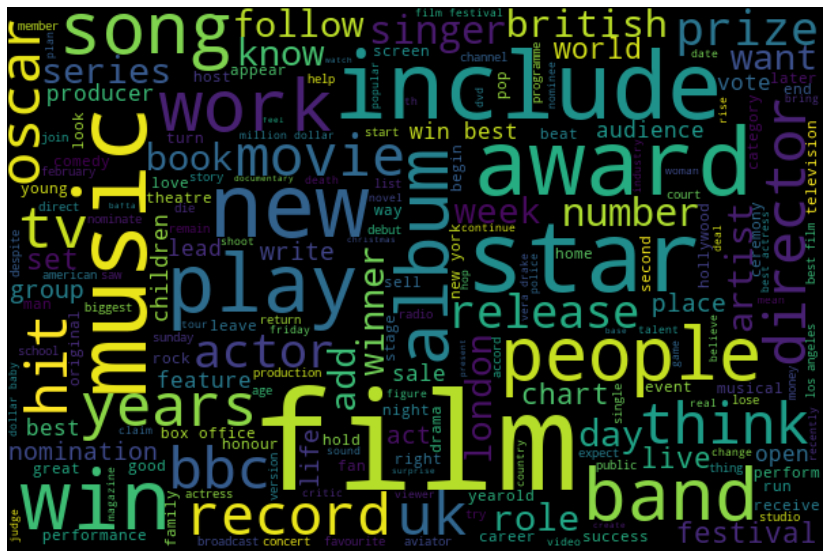

In [ ]:
# wordcloud of topic 'entertainment'

plt.figure(figsize=(15,10))
allWords = ' '.join([topic for topic in bbc1[bbc1['topics']=='entertainment']['news']])
wordCloud = WordCloud(width=600, height=400, random_state=0, max_font_size=100).generate(allWords)
plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
# frequent words of topic 'entertainment'

pd.Series(' '.join(bbc1[bbc1['topics']=='entertainment']['news']).split()).value_counts()[:10]

film       909
best       563
award      510
music      421
star       398
win        375
new        315
include    310
years      238
band       227
dtype: int64

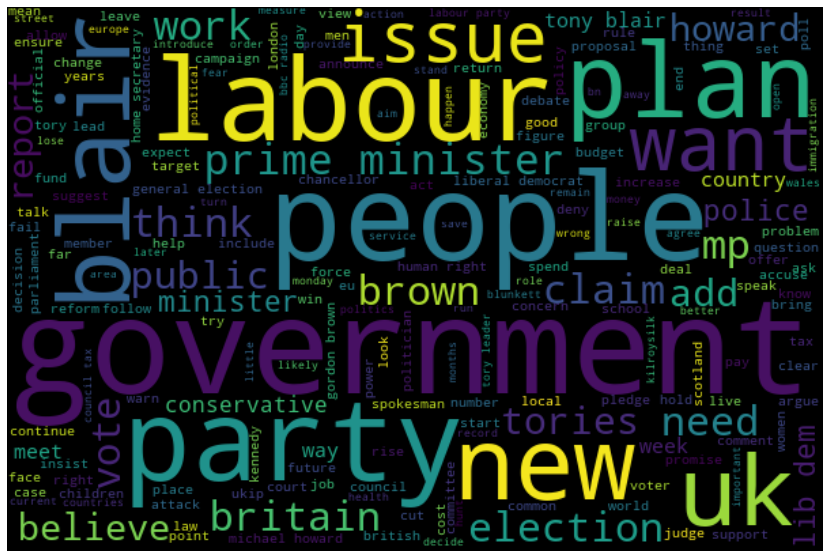

In [ ]:
# wordcloud of topic 'politics'

plt.figure(figsize=(15,10))
allWords = ' '.join([topic for topic in bbc1[bbc1['topics']=='politics']['news']])
wordCloud = WordCloud(width=600, height=400, random_state=0, max_font_size=100).generate(allWords)
plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
# frequent words of topic 'politics'

pd.Series(' '.join(bbc1[bbc1['topics']=='politics']['news']).split()).value_counts()[:10]

labour        726
government    705
party         672
people        604
minister      540
blair         534
election      529
plan          469
new           419
brown         355
dtype: int64

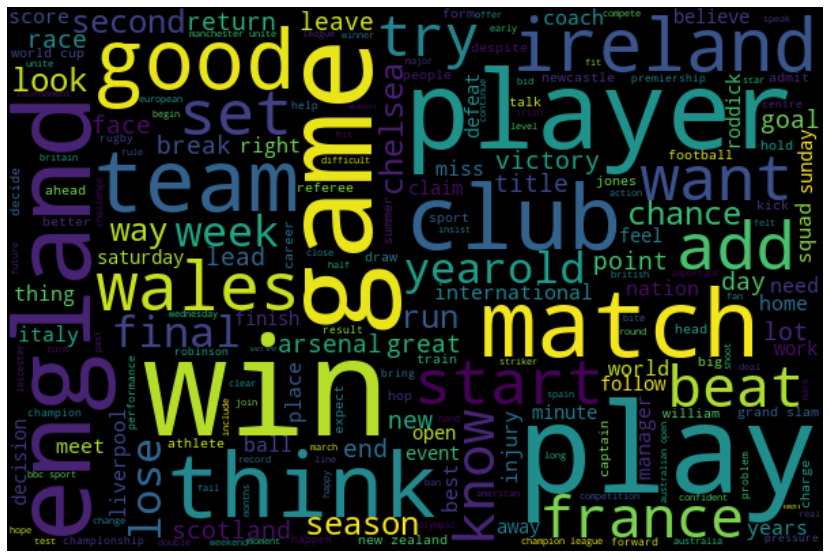

In [ ]:
# wordcloud of topic 'sport'

plt.figure(figsize=(15,10))
allWords = ' '.join([topic for topic in bbc1[bbc1['topics']=='sport']['news']])
wordCloud = WordCloud(width=600, height=400, random_state=0, max_font_size=100).generate(allWords)
plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
# frequent words of topic 'sport'

pd.Series(' '.join(bbc1[bbc1['topics']=='sport']['news']).split()).value_counts()[:10]

win        818
game       632
play       617
england    442
world      371
match      326
second     310
players    299
team       297
cup        291
dtype: int64

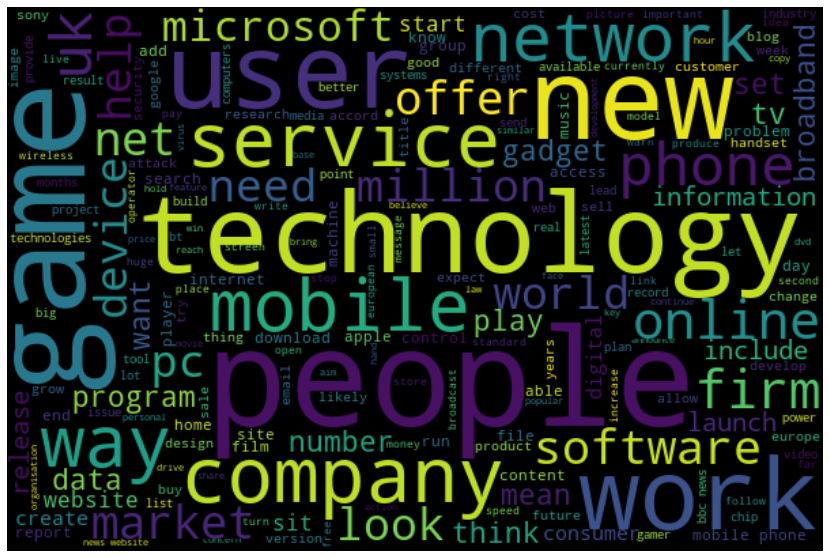

In [ ]:
# wordcloud of topic 'tech'

plt.figure(figsize=(15,10))
allWords = ' '.join([topic for topic in bbc1[bbc1['topics']=='tech']['news']])
wordCloud = WordCloud(width=600, height=400, random_state=0, max_font_size=100).generate(allWords)
plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
# frequent words of topic 'tech'

pd.Series(' '.join(bbc1[bbc1['topics']=='tech']['news']).split()).value_counts()[:10]

game          839
people        828
phone         485
technology    449
new           449
mobile        419
service       417
users         343
net           328
firm          321
dtype: int64

In [ ]:
# length of documents

In [ ]:
# creating 'length' column
bbc1['length']=bbc1['news'].apply(len)
bbc1.head()

news    topics  length
0  india fair trade rule india attend meet seven ...  business    1148
1  steel firm cut job mittal steel world largest ...  business     910
2  centre users lose patience customers try centr...  business    2023
3  ethiopia crop production ethiopia produce mill...  business     978
4  bsafety alert gm recall cars worlds biggest ca...  business    1140

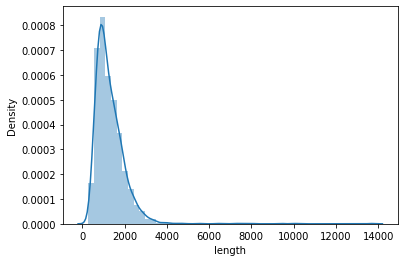

In [ ]:
# distplot
sns.distplot(bbc1['length'])
plt.show()

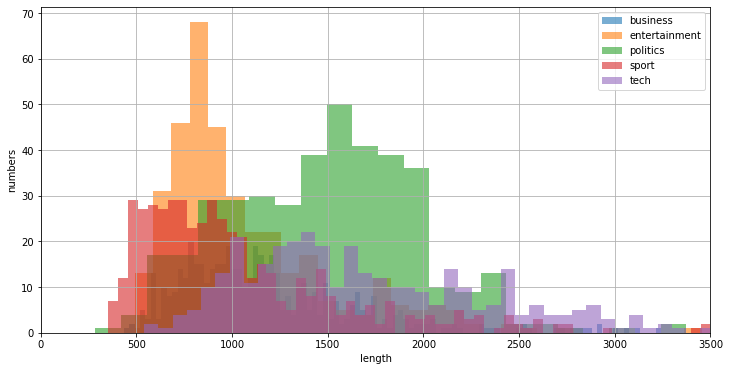

In [ ]:
bbc1_business = bbc1[bbc1['topics'] == 'business']
bbc1_entertainment = bbc1[bbc1['topics'] == 'entertainment']
bbc1_politics = bbc1[bbc1['topics'] == 'politics']
bbc1_sport = bbc1[bbc1['topics'] == 'sport']
bbc1_tech = bbc1[bbc1['topics'] == 'tech']

import matplotlib
matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)
bins = 100
plt.hist(bbc1_business['length'], alpha = 0.6, bins=bins, label='business')
plt.hist(bbc1_entertainment['length'], alpha = 0.6, bins=bins, label='entertainment')
plt.hist(bbc1_politics['length'], alpha = 0.6, bins=bins, label='politics')
plt.hist(bbc1_sport['length'], alpha = 0.6, bins=bins, label='sport')
plt.hist(bbc1_tech['length'], alpha = 0.6, bins=bins, label='tech')
plt.xlabel('length')
plt.ylabel('numbers')
plt.legend(loc='upper right')
plt.xlim(0,3500)
plt.grid()
plt.show()

In [ ]:
# number of words

In [ ]:
bbc1['word_count'] = bbc1['news'].apply(lambda x: len(str(x).split(" ")))
bbc1.head()

news  ... word_count
0  india fair trade rule india attend meet seven ...  ...        156
1  steel firm cut job mittal steel world largest ...  ...        124
2  centre users lose patience customers try centr...  ...        277
3  ethiopia crop production ethiopia produce mill...  ...        124
4  bsafety alert gm recall cars worlds biggest ca...  ...        159

[5 rows x 4 columns]

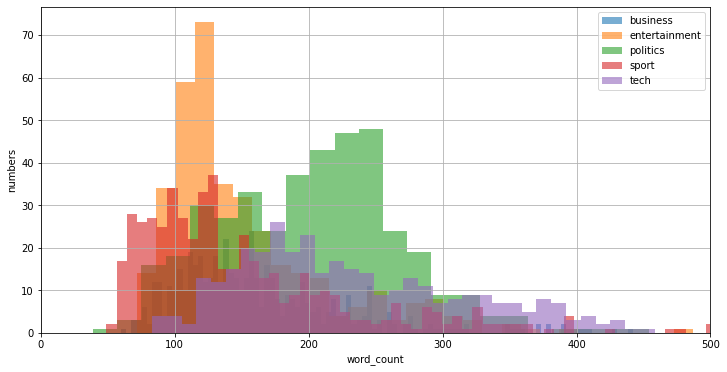

In [ ]:
bbc1_business = bbc1[bbc1['topics'] == 'business']
bbc1_entertainment = bbc1[bbc1['topics'] == 'entertainment']
bbc1_politics = bbc1[bbc1['topics'] == 'politics']
bbc1_sport = bbc1[bbc1['topics'] == 'sport']
bbc1_tech = bbc1[bbc1['topics'] == 'tech']

import matplotlib
matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)
bins = 100
plt.hist(bbc1_business['word_count'], alpha = 0.6, bins=bins, label='business')
plt.hist(bbc1_entertainment['word_count'], alpha = 0.6, bins=bins, label='entertainment')
plt.hist(bbc1_politics['word_count'], alpha = 0.6, bins=bins, label='politics')
plt.hist(bbc1_sport['word_count'], alpha = 0.6, bins=bins, label='sport')
plt.hist(bbc1_tech['word_count'], alpha = 0.6, bins=bins, label='tech')
plt.xlabel('word_count')
plt.ylabel('numbers')
plt.legend(loc='upper right')
plt.xlim(0,500)
plt.grid()
plt.show()

In [ ]:
# Average Word Length

In [ ]:
def avg_word(sentence):
  words = sentence.split()
  return (sum(len(word) for word in words)/len(words))
bbc1['avg_word'] = bbc1['news'].apply(lambda x: avg_word(x))
bbc1.head()

news  ...  avg_word
0  india fair trade rule india attend meet seven ...  ...  6.365385
1  steel firm cut job mittal steel world largest ...  ...  6.346774
2  centre users lose patience customers try centr...  ...  6.306859
3  ethiopia crop production ethiopia produce mill...  ...  6.895161
4  bsafety alert gm recall cars worlds biggest ca...  ...  6.176101

[5 rows x 5 columns]

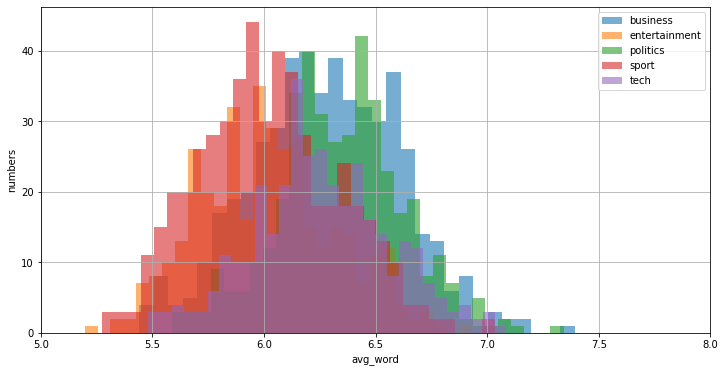

In [ ]:
bbc1_business = bbc1[bbc1['topics'] == 'business']
bbc1_entertainment = bbc1[bbc1['topics'] == 'entertainment']
bbc1_politics = bbc1[bbc1['topics'] == 'politics']
bbc1_sport = bbc1[bbc1['topics'] == 'sport']
bbc1_tech = bbc1[bbc1['topics'] == 'tech']

matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)
bins = 30
plt.hist(bbc1_business['avg_word'], alpha = 0.6, bins=bins, label='business')
plt.hist(bbc1_entertainment['avg_word'], alpha = 0.6, bins=bins, label='entertainment')
plt.hist(bbc1_politics['avg_word'], alpha = 0.6, bins=bins, label='politics')
plt.hist(bbc1_sport['avg_word'], alpha = 0.6, bins=bins, label='sport')
plt.hist(bbc1_tech['avg_word'], alpha = 0.6, bins=bins, label='tech')
plt.xlabel('avg_word')
plt.ylabel('numbers')
plt.legend(loc='upper right')
plt.xlim(5,8)
plt.grid()
plt.show()

## Model building

In [ ]:
# vectorization

In [ ]:
# using TF-IDF vectorizer 

vectorizer = TfidfVectorizer(max_df = 0.9, min_df = 0.05)
small_document_term_matrix = vectorizer.fit_transform(bbc1['news'])

In [ ]:
bbc2=bbc.copy()

In [ ]:
bbc2['news'] = bbc2['news'].astype('str') 

In [ ]:
# using TF-IDF vectorizer 

vectorizer = TfidfVectorizer(max_df = 0.9, min_df = 0.05)
small_document_term_matrix = vectorizer.fit_transform(bbc2['news'])

In [ ]:
small_document_term_matrix.shape

(2127, 705)

In [ ]:
small_document_term_matrix.shape

(2127, 513)

In [ ]:
# Latent Dirichlet allocation (LDA)

In [ ]:
# LDA model
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.manifold import TSNE

lda = LatentDirichletAllocation(n_components=5, max_iter=100, random_state=0, n_jobs=-1)
lda.fit(small_document_term_matrix)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='batch', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=100,
                          mean_change_tol=0.001, n_components=5, n_jobs=-1,
                          perp_tol=0.1, random_state=0, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)

In [ ]:
# LDA model
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.manifold import TSNE

lda = LatentDirichletAllocation(n_components=5, max_iter=200, random_state=0, n_jobs=-1)
lda.fit(small_document_term_matrix)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='batch', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=200,
                          mean_change_tol=0.001, n_components=5, n_jobs=-1,
                          perp_tol=0.1, random_state=None,
                          topic_word_prior=None, total_samples=1000000.0,
                          verbose=0)

In [ ]:
!pip install pyLDAvis

     |████████████████████████████████| 1.7MB 5.5MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-3.2.0-py2.py3-none-any.whl size=136694 sha256=7c4875e8c3cbbe920bad8167585080872725e6a0294eb3b9d0bb7ca3adc8feec
  Stored in directory: /root/.cache/pip/wheels/5e/62/9d/e2d11b7e09f85508b7be451fa35a2bce4b12c66c10b8bcb182
Successfully built pyLDAvis


In [ ]:
import pyLDAvis
import pyLDAvis.sklearn

In [ ]:
import pyLDAvis.sklearn

pyLDAvis.enable_notebook()

In [ ]:
lda_panel = pyLDAvis.sklearn.prepare(lda, small_document_term_matrix,vectorizer,mds='tsne')
lda_panel

PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
4      150.222153  -72.269554       1        1  28.159235
3       51.163364 -159.968018       2        1  23.691343
1      -73.144554   21.523815       3        1  22.627667
2      -66.410133 -110.606438       4        1  20.679619
0       54.417324   12.443444       5        1   4.842137, topic_info=       Term       Freq       Total Category  logprob  loglift
216    film  76.000000   76.000000  Default  30.0000  30.0000
80     best  57.000000   57.000000  Default  29.0000  29.0000
64   awards  32.000000   32.000000  Default  28.0000  28.0000
63    award  31.000000   31.000000  Default  27.0000  27.0000
575    star  28.000000   28.000000  Default  26.0000  26.0000
..      ...        ...         ...      ...      ...      ...
61       at   8.099305  110.401820   Topic5  -4.6630   0.4155
696     xc2   6.637617   63.622790   Topic5  -4.8621   0.7676
665     was   6.931613  139.534073   Topic5  -4.8187   0.0256
42     also   6.453192   66.177781   Topic5  -4.8902   0.7000
279     his   6.257678  102.550700   Topic5  -4.9210   0.2313

[294 rows x 6 columns], token_table=      Topic      Freq  Term
term                       
15        1  0.081725  2004
15        2  0.027242  2004
15        3  0.190691  2004
15        4  0.599315  2004
15        5  0.081725  2004
...     ...       ...   ...
697       1  0.291896  year
697       2  0.101529  year
697       3  0.139603  year
697       4  0.355352  year
697       5  0.101529  year

[707 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 4, 2, 3, 1])

In [ ]:
pyLDAvis.show(lda_panel)



FileNotFoundError: ignored

In [ ]:
terms_lda = vectorizer.get_feature_names()

In [ ]:
for i, comp in enumerate(lda.components_):
  terms_comp = zip(terms_lda, comp)
  sorted_words = sorted(terms_comp, key= lambda x:x[1], reverse=True)[:20]
  print("topic "+str(i)+": ")
  for t in sorted_words:
      print(t[0],end=" ")
  print("\n")

topic 0: 
labour party blair government election minister brown people plan howard tax secretary prime police public vote tory law issue chancellor 

topic 1: 
people phone game music technology mobile users network service software online tv program digital net new video internet information company 

topic 2: 
film win play game award best star england club match world second team cup champion open players beat season coach 

topic 3: 
bn company firm bank market share price rise sales growth economy profit trade economic deal report buy government cost financial 

topic 4: 
court test case charge appeal rule sport hear evidence legal claim decision file miss body action fail deny face accuse 



In [ ]:
def draw_word_cloud(index):
  imp_words_topic=""
  comp=lda.components_[index]
  terms_comp = zip(terms_lda, comp)
  sorted_words = sorted(terms_comp, key= lambda x:x[1], reverse=True)[:50]
  for word in sorted_words:
    imp_words_topic=imp_words_topic+" "+word[0]

  wordcloud = WordCloud(width=600, height=400).generate(imp_words_topic)
  plt.figure( figsize=(5,5))
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.tight_layout()
  plt.show()

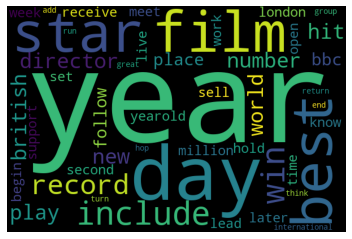

In [ ]:
draw_word_cloud(0)

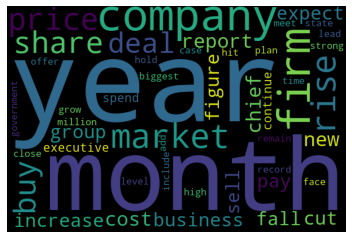

In [ ]:
draw_word_cloud(1)

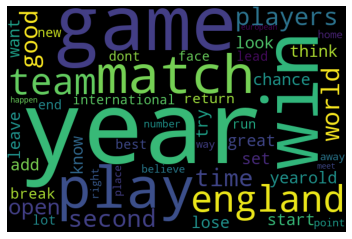

In [ ]:
draw_word_cloud(2)

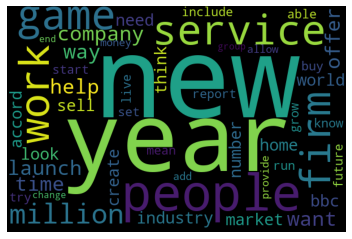

In [ ]:
draw_word_cloud(3)

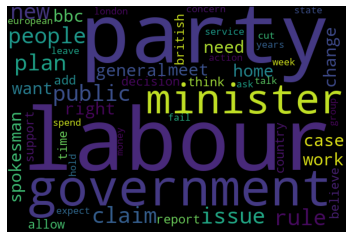

In [ ]:
draw_word_cloud(4)

In [ ]:
# Non-negative matrix factorization (NMF)

In [ ]:
from sklearn.decomposition import NMF
nmf = NMF(n_components=5, max_iter=1000, random_state=0)
nmf.fit(small_document_term_matrix)

NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=1000,
    n_components=5, random_state=0, shuffle=False, solver='cd', tol=0.0001,
    verbose=0)

In [ ]:
nmf_panel = pyLDAvis.sklearn.prepare(nmf, small_document_term_matrix,vectorizer,mds='tsne')
nmf_panel

PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
1      150.222153  -72.269554       1        1  25.286083
4       51.163364 -159.968018       2        1  22.892883
0      -73.144554   21.523815       3        1  21.450693
3      -66.410133 -110.606438       4        1  19.428005
2       54.417324   12.443444       5        1  10.942336, topic_info=        Term        Freq       Total Category  logprob  loglift
167     film  123.000000  123.000000  Default  30.0000  30.0000
31     award   68.000000   68.000000  Default  29.0000  29.0000
41      best   66.000000   66.000000  Default  28.0000  28.0000
240   labour   66.000000   66.000000  Default  27.0000  27.0000
48        bn   67.000000   67.000000  Default  26.0000  26.0000
..       ...         ...         ...      ...      ...      ...
483       uk    9.726914   54.875466   Topic5  -4.8990   0.4824
290  million    8.420938   36.868866   Topic5  -5.0431   0.7359
333     play    9.370586   71.746676   Topic5  -4.9363   0.1770
304      new    9.215650   75.536993   Topic5  -4.9530   0.1088
265   london    7.747742   30.151621   Topic5  -5.1265   0.8537

[235 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
2         2  0.936744   access
2         4  0.052041   access
4         2  0.175132  account
4         3  0.758906  account
4         4  0.058377  account
...     ...       ...      ...
510       1  0.269933    years
510       2  0.166112    years
510       3  0.249169    years
510       4  0.124584    years
510       5  0.207641    years

[546 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 5, 1, 4, 3])

In [ ]:
nmf_panel = pyLDAvis.sklearn.prepare(nmf, small_document_term_matrix,vectorizer,mds='tsne')
nmf_panel

/usr/local/lib/python3.6/dist-packages/pyLDAvis/_prepare.py:223: RuntimeWarning: divide by zero encountered in log
  kernel = (topic_given_term * np.log((topic_given_term.T / topic_proportion).T))
/usr/local/lib/python3.6/dist-packages/pyLDAvis/_prepare.py:240: RuntimeWarning: divide by zero encountered in log
  log_lift = np.log(topic_term_dists / term_proportion)
/usr/local/lib/python3.6/dist-packages/pyLDAvis/_prepare.py:241: RuntimeWarning: divide by zero encountered in log
  log_ttd = np.log(topic_term_dists)


PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
1      150.222153  -72.269554       1        1  25.024126
4       51.163364 -159.968018       2        1  22.312640
0      -73.144554   21.523815       3        1  22.219273
3      -66.410133 -110.606438       4        1  19.667151
2       54.417324   12.443444       5        1  10.776809, topic_info=       Term        Freq       Total Category  logprob  loglift
164    film  129.000000  129.000000  Default  30.0000  30.0000
31    award   59.000000   59.000000  Default  29.0000  29.0000
41     best   67.000000   67.000000  Default  28.0000  28.0000
237  labour   67.000000   67.000000  Default  27.0000  27.0000
434    star   51.000000   51.000000  Default  26.0000  26.0000
..      ...         ...         ...      ...      ...      ...
262  london    7.905166   30.428915   Topic5  -5.0824   0.8799
301     new    9.930324   77.655662   Topic5  -4.8543   0.1711
329    play    9.680912   72.006334   Topic5  -4.8798   0.2212
304  number    8.270817   48.350669   Topic5  -5.0372   0.4620
496    work    7.908450   53.829272   Topic5  -5.0820   0.3099

[233 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
2         2  0.943430   access
2         4  0.049654   access
4         2  0.176604  account
4         3  0.765283  account
4         4  0.058868  account
...     ...       ...      ...
502       5  0.204567    years
504       1  0.321002    young
504       2  0.160501    young
504       4  0.160501    young
504       5  0.374503    young

[543 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 5, 1, 4, 3])

In [ ]:
terms_nmf = vectorizer.get_feature_names()

In [ ]:
for i, comp in enumerate(nmf.components_):
  terms_comp = zip(terms_nmf, comp)
  sorted_words = sorted(terms_comp, key= lambda x:x[1], reverse=True)[:20]
  print("topic "+str(i)+": ")
  for t in sorted_words:
      print(t[0],end=" ")
  print("\n")

topic 0: 
company bank market firm rise price growth sales economy share profit economic trade deal report analysts cost stock expect chief 

topic 1: 
game win play england match cup players team wales club coach world ireland injury second season beat open good france 

topic 2: 
film award best star director win include british screen role office book release music feature years new play love life 

topic 3: 
labour party blair election government minister brown tax howard prime tory plan tories chancellor campaign leader people vote public britain 

topic 4: 
people phone mobile technology music service users net software network digital program new internet online information firm work video security 



In [ ]:
def draw_word_cloud(index):
  imp_words_topic=""
  comp=nmf.components_[index]
  terms_comp = zip(terms_nmf, comp)
  sorted_words = sorted(terms_comp, key= lambda x:x[1], reverse=True)[:50]
  for word in sorted_words:
    imp_words_topic=imp_words_topic+" "+word[0]

  wordcloud = WordCloud(width=600, height=400).generate(imp_words_topic)
  plt.figure( figsize=(5,5))
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.tight_layout()
  plt.show()

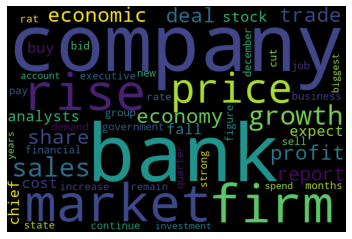

In [ ]:
draw_word_cloud(0)

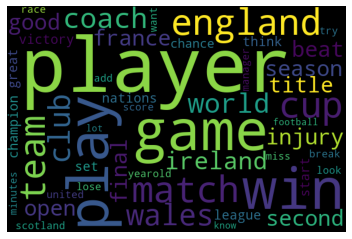

In [ ]:
draw_word_cloud(1)

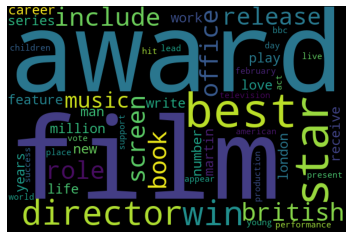

In [ ]:
draw_word_cloud(2)

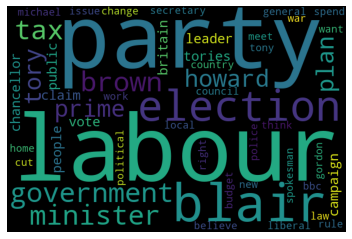

In [ ]:
draw_word_cloud(3)

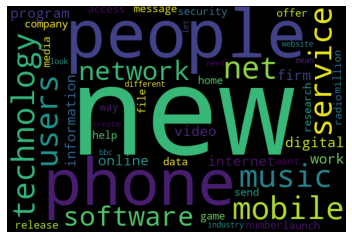

In [ ]:
draw_word_cloud(4)

In [ ]:
# Latent Semantic Analysis (LSA)

In [ ]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=5, algorithm='randomized', n_iter=1000, random_state=0)
svd.fit(small_document_term_matrix)

TruncatedSVD(algorithm='randomized', n_components=5, n_iter=1000,
             random_state=0, tol=0.0)

In [ ]:
terms_lsa = vectorizer.get_feature_names()

In [ ]:
for i, comp in enumerate(svd.components_):
  terms_comp = zip(terms_lsa, comp)
  sorted_words = sorted(terms_comp, key= lambda x:x[1], reverse=True)[:20]
  print("topic "+str(i)+": ")
  for t in sorted_words:
      print(t[0],end=" ")
  print("\n")

topic 0: 
game win film new people play company world government firm best work years want market plan think labour number add 

topic 1: 
film game win play best award star england match cup players beat team injury title coach wales season ireland second 

topic 2: 
film award best star director include music screen million office company release sales british role book feature firm production share 

topic 3: 
labour blair party election film brown howard minister prime tax tory tories government chancellor best campaign award vote leader tony 

topic 4: 
phone people mobile technology game users music service software program digital network net video online internet information security message like 



In [ ]:
def draw_word_cloud(index):
  imp_words_topic=""
  comp=svd.components_[index]
  terms_comp = zip(terms_lsa, comp)
  sorted_words = sorted(terms_comp, key= lambda x:x[1], reverse=True)[:50]
  for word in sorted_words:
    imp_words_topic=imp_words_topic+" "+word[0]

  wordcloud = WordCloud(width=600, height=400, background_color='white').generate(imp_words_topic)
  plt.figure( figsize=(5,5))
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.tight_layout()
  plt.show()

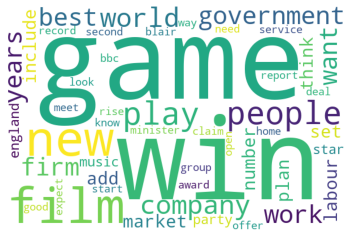

In [ ]:
draw_word_cloud(0)

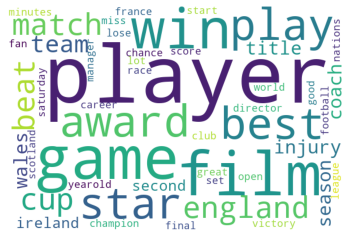

In [ ]:
draw_word_cloud(1)

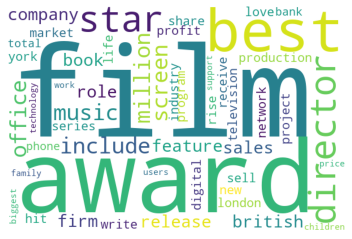

In [ ]:
draw_word_cloud(2)

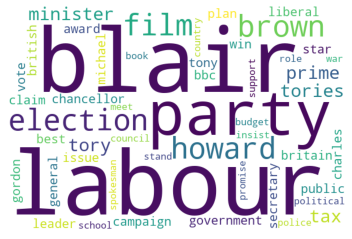

In [ ]:
draw_word_cloud(3)

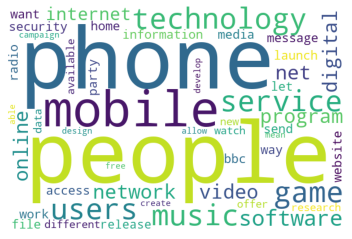

In [ ]:
draw_word_cloud(4)

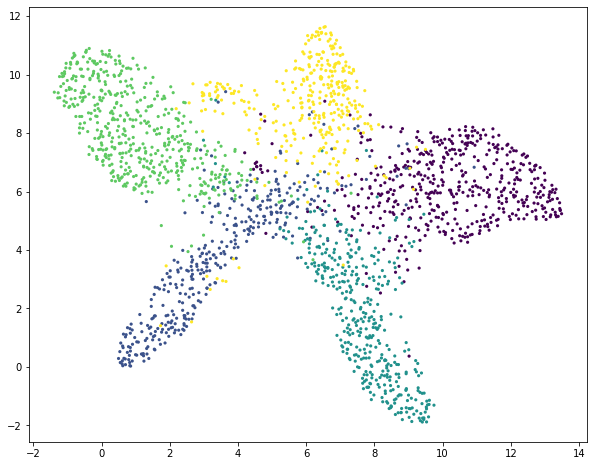

In [ ]:
import umap

all_topics = svd.fit_transform(small_document_term_matrix)
embedding = umap.UMAP(n_neighbors=150, min_dist=0.5, random_state=0).fit_transform(all_topics)
bbc1['target'] = pd.factorize(bbc1['topics'])[0] + 1

plt.figure(figsize=(10,8))
plt.scatter(embedding[:, 0], embedding[:, 1], c = bbc1.target, s = 10, edgecolor='none')
plt.show()